In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
def create_model(inputs,output_size):
    inputs = tf.keras.Input(shape=inputs.shape)
    x = Conv2D(filters=64, kernel_size=3, activation = 'relu', padding='same')(inputs)
    x  = MaxPooling2D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
    x  = MaxPooling2D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(output_size, activation='softmax')(x)
    
    return inputs, x
    

In [6]:
output_size = 62
inputs = np.zeros((28, 28, 1))
input_, output = create_model(inputs,output_size = 62)

In [7]:
model = tf.keras.Model(inputs=input_, outputs = output)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0   

### Load Data

In [9]:
dataset = pd.read_csv('dataset_final_2.csv', low_memory=False, header=None)

In [10]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
422514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
422515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
422516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


In [11]:
dataset.iloc[:,784].unique()

array(['1', '0', '4', '7', '3', '5', '8', '9', '2', '6', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 'u', 'v', 'w', 'x', 'y', 'z', 't'], dtype=object)

In [12]:
dataset_shuffled = dataset.sample(frac=1)

In [13]:
dataset_shuffled

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
391469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,W
386983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,V
348384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
392657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
334397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
313997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
185971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


In [53]:
x = dataset_shuffled.iloc[:,0:784].values
y = dataset_shuffled.iloc[:,784:].values

array(['J'], dtype=object)

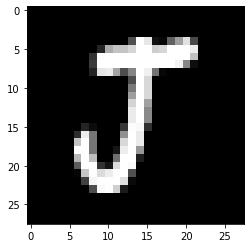

In [54]:
i=1784
plt.imshow(x[i].reshape(28,28), cmap='gray')
y[i]

In [66]:
le = LabelEncoder()
y_encoded = le.fit_transform(y.reshape(-1,))
print(np.unique(y_encoded))
print(le.inverse_transform([y_encoded[1784]]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
['J']


In [67]:
y_encoded = y_encoded.reshape(-1,1)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='drop')
y_ct = ct.fit_transform(y_encoded)

In [68]:
y_ct = y_ct.toarray()
print(y_ct)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [69]:
y_ct = y_ct.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y_ct, test_size=0.4, random_state=1)

In [70]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (253510, 784)
x_test shape: (169008, 784)
y_train shape: (253510, 62)
y_test shape: (169008, 62)


array(['S'], dtype=object)

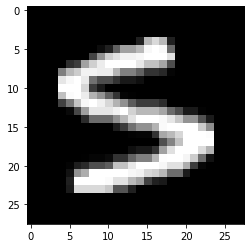

In [74]:
plt.imshow(x_train[10].reshape(28,28), cmap = 'gray')
le.inverse_transform([np.argmax(y_train[10])])

In [75]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train.reshape(-1, 28, 28, 1))
validation_datagen.fit(x_test.reshape(-1, 28, 28, 1))

In [76]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
             metrics=['accuracy'])

In [77]:
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=validation_datagen.flow(x_test, y_test, batch_size=32),
                    epochs=20)

Epoch 1/20
3962/3962 [==============================] - 53s 11ms/step - loss: 0.3948 - accuracy: 0.8963 - val_loss: 0.1533 - val_accuracy: 0.9579
Epoch 2/20
3962/3962 [==============================] - 42s 11ms/step - loss: 0.1476 - accuracy: 0.9585 - val_loss: 0.1111 - val_accuracy: 0.9695
Epoch 3/20
3962/3962 [==============================] - 41s 10ms/step - loss: 0.1083 - accuracy: 0.9690 - val_loss: 0.1021 - val_accuracy: 0.9709
Epoch 4/20
3962/3962 [==============================] - 42s 11ms/step - loss: 0.0868 - accuracy: 0.9749 - val_loss: 0.0839 - val_accuracy: 0.9763
Epoch 5/20
3962/3962 [==============================] - 41s 10ms/step - loss: 0.0724 - accuracy: 0.9785 - val_loss: 0.0772 - val_accuracy: 0.9778
Epoch 6/20
3962/3962 [==============================] - 41s 10ms/step - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.0722 - val_accuracy: 0.9793
Epoch 7/20
3962/3962 [==============================] - 41s 10ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0697 -

In [110]:
# model.save('ocr_model_v3.h5')

In [105]:
import cv2
image_h = cv2.imread('word4.jpg')
image_h = cv2.cvtColor(image_h, cv2.COLOR_BGR2GRAY)
_ ,binaryImg = cv2.threshold(image_h, 127, 255, cv2.THRESH_BINARY_INV)

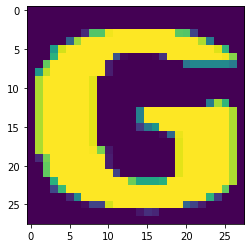

In [106]:
plt.imshow(image_h[:,75:100], cmap='gray')
binaryImg = cv2.resize(binaryImg[:, 5:30], (28,28), interpolation = cv2.INTER_AREA)
plt.imshow(binaryImg)

In [107]:
y_pred = model.predict(binaryImg.reshape(-1,28,28,1))

1/1 [==============================] - 0s 17ms/step


In [108]:
y_pred = np.argmax(y_pred)
print(y_pred)

16


In [109]:
le.inverse_transform([y_pred])

array(['G'], dtype=object)